In [60]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")

covid_df = pd.read_csv('multivariate_eng_df.csv', index_col = 'Date', parse_dates = True)

In [61]:
columns_to_drop_1 = ['Unnamed: 0', 'STATE']
covid_df = covid_df.drop(columns=columns_to_drop_1)

In [62]:
covid_df_Top10 = covid_df.loc[covid_df['PROVINCE_STATE_NAME'].isin(['California', 'Texas', 'Florida', 'New York', 'Pennsylvania', 'Illinois', 'Ohio', 'Georgia', 'North Carolina', 'Michigan'])]
covid_df_Top10

,PROVINCE_STATE_NAME,Completeness_pct,Administered_Dose1_Recip,Administered_Dose1_Recip_5Plus,Administered_Dose1_Recip_12Plus,Administered_Dose1_Recip_18Plus,Administered_Dose1_Recip_65Plus,Series_Complete_Yes,Series_Complete_5Plus,Series_Complete_5to17,...,vaccination_rate_complete,booster_rate,prop_age04,prop_age59,prop_age6064,prop_age8084,prop_age85plus,AGE04_29_TOT,AGE30_59_TOT,AGE60PLUS_TOT
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-21,California,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,5.744418,6.165309,5.818187,1.716470,1.860398,13077768,15818572,8169914
2020-01-22,California,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,5.744418,6.165309,5.818187,1.716470,1.860398,13077768,15818572,8169914
2020-01-23,California,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,5.744418,6.165309,5.818187,1.716470,1.860398,13077768,15818572,8169914
2020-01-24,California,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,5.744418,6.165309,5.818187,1.716470,1.860398,13077768,15818572,8169914
2020-01-25,California,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,5.744418,6.165309,5.818187,1.716470,1.860398,13077768,15818572,8169914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-25,Texas,25120.6,20890120.0,20884105.0,19864532.0,18040473.0,3628247.0,17587233.0,17585807.0,2128796.0,...,0.585664,0.219948,6.335885,6.946010,5.387383,1.469608,1.337448,10530755,11768099,5644861
2022-04-26,Texas,25120.6,20897363.0,20891339.0,19869792.0,18044864.0,3628950.0,17591452.0,17590025.0,2130855.0,...,0.585804,0.221604,6.335885,6.946010,5.387383,1.469608,1.337448,10530755,11768099,5644861
2022-04-27,Texas,25120.6,20907738.0,20901703.0,19877395.0,18051163.0,3630034.0,17598026.0,17596598.0,2132974.0,...,0.586023,0.221844,6.335885,6.946010,5.387383,1.469608,1.337448,10530755,11768099,5644861


In [63]:
print(covid_df.columns.values, sep=',')

['PROVINCE_STATE_NAME' 'Completeness_pct' 'Administered_Dose1_Recip'
 'Administered_Dose1_Recip_5Plus' 'Administered_Dose1_Recip_12Plus'
 'Administered_Dose1_Recip_18Plus' 'Administered_Dose1_Recip_65Plus'
 'Series_Complete_Yes' 'Series_Complete_5Plus' 'Series_Complete_5to17'
 'Series_Complete_12Plus' 'Series_Complete_18Plus'
 'Series_Complete_65Plus' 'Booster_Doses' 'Booster_Doses_5Plus'
 'Booster_Doses_12Plus' 'Booster_Doses_18Plus' 'Booster_Doses_50Plus'
 'Booster_Doses_65Plus' 'Second_Booster_50Plus' 'Second_Booster_65Plus'
 'Bivalent_Booster_5Plus' 'Bivalent_Booster_12Plus'
 'Bivalent_Booster_18Plus' 'Bivalent_Booster_65Plus'
 'PEOPLE_DEATH_NEW_COUNT' 'PEOPLE_POSITIVE_NEW_CASES_COUNT'
 'PEOPLE_DEATH_COUNT' 'TOT_POP' 'WA_MALE' 'WA_FEMALE' 'BA_MALE'
 'BA_FEMALE' 'IA_MALE' 'IA_FEMALE' 'AA_MALE' 'AA_FEMALE' 'NA_MALE'
 'NA_FEMALE' 'TOM_MALE' 'TOM_FEMALE' 'WAC_MALE' 'WAC_FEMALE' 'BAC_MALE'
 'BAC_FEMALE' 'IAC_MALE' 'IAC_FEMALE' 'AAC_MALE' 'AAC_FEMALE' 'NAC_MALE'
 'NAC_FEMALE' 'NH_MALE' '

## Random Forest for Feature Selection

In [64]:
columns_to_drop = ['PROVINCE_STATE_NAME']
X = covid_df_Top10.drop(columns=columns_to_drop)

In [67]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
y = covid_df_Top10['PEOPLE_POSITIVE_NEW_CASES_COUNT']
rfe = RFE(RandomForestRegressor(n_estimators=100, random_state=1), n_features_to_select=40)
fit = rfe.fit(X, y)

In [68]:
names = X.columns
for i in range(len(fit.support_)):
    if fit.support_[i]:
        print(names[i])

Administered_Dose1_Recip
Administered_Dose1_Recip_12Plus
Series_Complete_5Plus
Series_Complete_5to17
Series_Complete_12Plus
Booster_Doses_12Plus
Booster_Doses_18Plus
Booster_Doses_50Plus
Booster_Doses_65Plus
PEOPLE_POSITIVE_NEW_CASES_COUNT
HIA_MALE
new_cases_3_lag
new_cases_4_lag
new_cases_7_lag
new_cases_50_lag
new_cases_150_lag
new_cases_350_lag
new_deaths_3_lag
new_deaths_4_lag
new_deaths_50_lag
new_cases_10_mean
new_cases_100_mean
new_cases_10_std
new_cases_50_std
new_cases_100_std
new_cases_10_max
new_cases_50_max
new_cases_100_max
new_deaths_10_mean
new_deaths_100_mean
new_deaths_10_std
new_deaths_50_std
new_deaths_100_std
new_deaths_10_max
new_deaths_50_max
new_deaths_100_max
new_deaths_10_min
vaccination_rate_1dose
vaccination_rate_complete
booster_rate


## Feature Correlation Test

In [13]:
threshold_date = '2020-12-11'
covid_df_Top10['vaccine availability'] = (covid_df_Top10['Date'] >= threshold_date).astype(int)

In [42]:
eng_feature_test = covid_df_Top10.loc[:, [
    'PEOPLE_POSITIVE_NEW_CASES_COUNT', 'vaccination_rate_complete', 'booster_rate', 'vaccine availability',
'new_cases_1 lag', 'new_cases_4_lag', 
'new_cases_7_lag', 'new_cases_30_lag', 'new_cases_50_lag', 'new_cases_150_lag',
'new_cases_350_lag', 'new_deaths_1_lag', 
'new_deaths_4_lag', 'new_deaths_7_lag', 'new_deaths_30_lag', 'new_deaths_50_lag', 'prop_age04', 'prop_age59',
 'prop_age6064' ,'prop_age8084' ,'prop_age85plus', 'AGE04_29_TOT',
 'AGE30_59_TOT' ,'AGE60PLUS_TOT'
    
]]

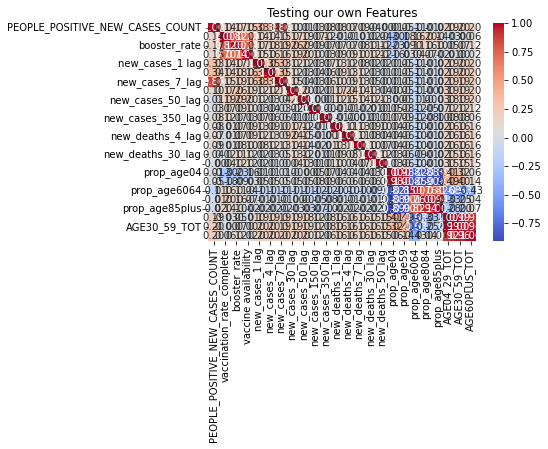

In [43]:
featue_test_matrix = eng_feature_test.corr()
sns.heatmap(featue_test_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Testing our own Features')
plt.show()

In [50]:
corr_threshold = 0.7

high_corr = set()
for i in range(len(featue_test_matrix.columns)):
    for j in range(i):
        if abs(featue_test_matrix.iloc[i, j]) > corr_threshold:
            colname = featue_test_matrix.columns[i]
            high_corr.add(colname)

In [51]:
high_corr

{'AGE30_59_TOT',
 'AGE60PLUS_TOT',
 'booster_rate',
 'new_cases_7_lag',
 'prop_age59',
 'prop_age6064',
 'prop_age8084',
 'prop_age85plus',
 'vaccine availability'}

## PCA Test

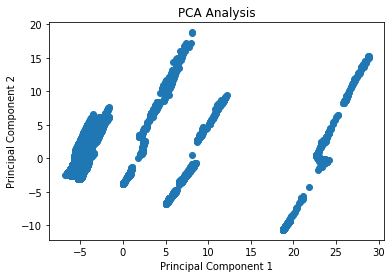

In [55]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

columns_to_drop = ['Date', 'PROVINCE_STATE_NAME']
pca_df = covid_df_Top10.drop(columns=columns_to_drop)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(pca_df)

pca = PCA(n_components=2)  # Specify the number of components you want to keep
principal_components = pca.fit_transform(scaled_data)

# Create a DataFrame to hold the principal components
pc_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Visualize the principal components
plt.scatter(pc_df['PC1'], pc_df['PC2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Analysis')
plt.show()

In [56]:
explained_variance_ratio = pca.explained_variance_ratio_

# Determine the number of components to keep
# You can set a threshold for the explained variance ratio
cumulative_variance_ratio = explained_variance_ratio.cumsum()
n_components_to_keep = sum(cumulative_variance_ratio < 0.95) + 1

# Perform PCA again with the selected number of components
pca = PCA(n_components=n_components_to_keep)
selected_principal_components = pca.fit_transform(scaled_data)

# Create a DataFrame with the selected principal components
selected_pc_df = pd.DataFrame(data=selected_principal_components, columns=[f'PC{i}' for i in range(1, n_components_to_keep + 1)])

In [57]:
selected_pc_df

,PC1,PC2,PC3
0,18.784624,-10.565783,-4.013763
1,18.780515,-10.575216,-4.020204
2,18.778045,-10.581399,-4.023106
3,18.775696,-10.584734,-4.026599
4,18.772508,-10.589085,-4.031237
...,...,...,...
8295,10.153029,5.163374,4.359883
8296,10.146262,5.152202,4.331216
8297,10.149125,5.129773,4.321294
8298,10.161705,5.134539,4.326264
